# DATA GATHERING

In [2]:
#Reopen the database connection
import pymysql
#The next raw is masked for privacy data policy
db = pymysql.connect(host="****",user = "*****",passwd ="******",database ="******", port=******)

# prepare a cursor object using cursor() method
cursor = db.cursor()

# execute SQL query to create a dataframe(the same dataframe of the excel spreadsheet Orders)
import pandas as pd

# this sql query is the one that produces the view saved in the MySQL database as 'v.orders'
orders = pd.read_sql_query("select distinct `o`.`id` AS `id`,`o`.`description` AS `description`,`o`.`type` AS `type`,`o`.`user_id` AS `user_id`,`o`.`pickup_address_id` AS `pickup_address_id`,`o`.`delivery_address_id` AS `delivery_address_id`,`o`.`locker_code` AS `locker_code`,`o`.`unique_code` AS `unique_code`,`o`.`status` AS `status`,`o`.`payment_status` AS `payment_status`,`o`.`invoice_id` AS `invoice_id`,`o`.`vat` AS `vat`,`o`.`sub_total` AS `sub_total`,`o`.`delivery_costs` AS `delivery_costs`,`o`.`discount_total` AS `discount_total`,`o`.`grand_total` AS `grand_total`,`o`.`locked` AS `locked`,`o`.`due` AS `due`,case when `o`.`primary_service_provider_id` is not null then `o`.`primary_service_provider_id` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_id` end AS `primary_service_provider_id`,case when `o`.`primary_service_provider_id` is not null then `sp`.`name` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_name` end AS `primary_sp_name`,case when `o`.`primary_service_provider_id` is not null then `sp`.`type` when `sp2`.`service_provider_id` is not null then `sp2`.`primary_sp_type` end AS `primary_sp_type`,case when `o`.`primary_service_provider_id` is not null then `sp`.`primary_service_description` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_name` end AS `primary_service_description`,case when `o`.`primary_service_provider_id` is not null then 'Servicios' when `sp2`.`service_provider_id` is not null then 'Servicios' else 'Paqueteria' end AS `primary_sp_type_gral`,`o`.`route_leg_id` AS `route_leg_id`,`o`.`pickup_reminder_counter` AS `pickup_reminder_counter`,`o`.`last_reminder_time` AS `last_reminder_time`,`o`.`cancelled_at` AS `cancelled_at`,`o`.`created_at` AS `created_at`,`o`.`updated_at` AS `updated_at`,`o`.`confirmed_at` AS `confirmed_at`,`o`.`active_from` AS `active_from`,`o`.`original_id` AS `original_id`,date_format(`o`.`created_at`,'%Y-%m-%d') AS `date`,year(`o`.`created_at`) AS `date_created_year`,month(`o`.`created_at`) AS `date_created_month`,concat(month(`o`.`created_at`),'-',year(`o`.`created_at`)) AS `date_month_year`,dayofmonth(`o`.`created_at`) AS `date_created_day`,monthname(`o`.`created_at`) AS `date_created_monthName`,date_format(`o`.`created_at`,'%W') AS `date_creted_day_Name`,hour(`o`.`created_at`) AS `date_created_hour`,`opr`.`promotion_id` AS `promotion_id`,`opr`.`discount` AS `discount`,`pr`.`promo_code` AS `promo_code`,`pr`.`type` AS `promo_type`,`pr`.`value` AS `promo_value`,`pr`.`service_provider_id` AS `promo_service_provider_id`,`sp`.`name` AS `promo_service_provider`,`u`.`first_name` AS `first_name`,`u`.`last_name` AS `last_name`,`u`.`phone_number` AS `phone_number`,`u`.`email` AS `email`,`u`.`advertising_consent` AS `advertising_consent`,date_format(`u`.`created_at`,'%Y-%m-%d') AS `date_alta_user`,`l`.`channel_id` AS `channel_id`,`ch`.`name` AS `channel_name`,case when `o`.`primary_service_provider_id` in (40,41,46) then 'Lavalocker' when `sp2`.`service_provider_id` in (40,41,46) then 'Lavalocker' when `o`.`primary_service_provider_id` is null then 'Null' when `sp2`.`service_provider_id` is null then 'Null' when `ch`.`name` is null then 'Null' else `ch`.`name` end AS `Canal`,`o`.`locker_id` AS `locker_id`,`l`.`name` AS `locker_name`,`l`.`location_town_city` AS `location_town_city`,`l`.`status` AS `locker_status`,`lc`.`display_number` AS `locker_dismplay_number`,`lc`.`block` AS `locker_block`,`lc`.`locker_cell_size_id` AS `locker_cell_size_id`,`lcs`.`name` AS `locker_size_name`,`o`.`locked_by_user_id` AS `locked_by_user_id`,`o`.`locker_cell_id` AS `locker_cell_id`,`o`.`drop_off_locker_cell_id` AS `drop_off_locker_cell_id`,`o`.`pick_up_locker_cell_id` AS `pick_up_locker_cell_id`,`o`.`drop_off_locker_cell_size_id` AS `drop_off_locker_cell_size_id`,timestampdiff(DAY,`o`.`confirmed_at`,`o`.`updated_at`) AS `recogida_dias`,concat(timestampdiff(HOUR,`o`.`confirmed_at`,`o`.`updated_at`) MOD 24,':',timestampdiff(MINUTE,`o`.`confirmed_at`,`o`.`updated_at`) MOD 60) AS `recogida_horas`,`u`.`language_code` AS `language_code`,replace(`l`.`coordinates_long`,',','.') AS `coordinates_lat`,replace(`l`.`coordinates_lat`,',','.') AS `coordinates_long`,concat(convert(replace(`l`.`coordinates_long`,',','.') using utf8mb4),', ',convert(replace(`l`.`coordinates_lat`,',','.') using utf8mb4)) AS `coordinates_lat_long`,year(`l`.`created_at`) AS `date_created_year_locker`,month(`l`.`created_at`) AS `date_created_month_locker`,`o`.`courier` AS `courier`,`u`.`channel_id` AS `user_channel_id`,`chu`.`name` AS `user_channel_name`,`l`.`mktg` AS `mktg`,`o`.`deleted_at` AS `deleted_at`,`u`.`invoice_payments` AS `invoice_payments`,`o`.`discount_total` + `o`.`grand_total` AS `Gross`,`o`.`rating` AS `rating` from ((((((((((`mayordomo`.`orders` `o` left join `mayordomo`.`lockers` `l` on(`o`.`locker_id` = `l`.`id`)) left join `mayordomo`.`order_promotions` `opr` on(`opr`.`order_id` = `o`.`id`)) left join `mayordomo`.`promotions` `pr` on(`pr`.`id` = `opr`.`promotion_id`)) left join `mayordomo`.`service_providers` `sp` on(`sp`.`id` = `o`.`primary_service_provider_id`)) left join `mayordomo`.`users` `u` on(`u`.`id` = `o`.`user_id`)) left join `mayordomo`.`channels` `ch` on(`ch`.`id` = `l`.`channel_id`)) left join `mayordomo`.`channels` `chu` on(`chu`.`id` = `u`.`channel_id`)) left join `mayordomo`.`locker_cells` `lc` on(`lc`.`locker_id` = `o`.`locker_id` and `lc`.`id` = `o`.`drop_off_locker_cell_id`)) left join `mayordomo`.`locker_cell_sizes` `lcs` on(`lcs`.`id` = `lc`.`locker_cell_size_id`)) left join `mayordomo`.`v_orders_services_provider` `sp2` on(`o`.`id` = `sp2`.`order_id`)) where `o`.`deleted_at` is null", db)
print(orders)

            id description                type  user_id  pickup_address_id  \
0          196        None                None        2                NaN   
1          199        None                None       26                NaN   
2          205        None                None       29                NaN   
3          229        None                None       36                NaN   
4          247        None                None       41                NaN   
...        ...         ...                 ...      ...                ...   
155512  171825        None  delivery_with_code    20298                NaN   
155513  171826        None  delivery_with_code    20265                NaN   
155514  171827        None  delivery_with_code    23992                NaN   
155515  171828        None      bizcocho_order    25105                NaN   
155516  171829        None      bizcocho_order    19833                NaN   

        delivery_address_id locker_code unique_code  \
0       

# DATA CLEANING

In [3]:
#FILTERING AND CLEANING THE DATABASE (1)

#I filter out the orders made from Lagoon and Lavalocker because those are not smartpoints
orders1 = orders[~orders["locker_name"].isin(["Lavalocker Domicilios", "Lagoon"])]

#I filter out the orders made from the smartpoints that have status that is not "online"
orders12 = orders1[orders1['locker_status']=="Online"]

#Smartpoints we filter out because are in Incubacion
orders12 = orders12[~orders12["locker_name"].isin(['Marques de Pombal', 'Mendez Alvaro','BeCorp Modolell', 'Ausias March 41', 'Torre Zen', 'Vinyar 21'])]

#Other smartpoints we want to filter out
orders12 = orders12[~orders12["locker_name"].isin(['Girona', 'KNEM', 'Mayordomo Ramon Turro'])]

In [4]:
#Checking for users that used more than one smartpoint
users_multilocker = orders12.groupby(["user_id", "locker_name"]).size()
users_multilocker = users_multilocker.to_frame()
users_multilocker = users_multilocker.reset_index()

users_multilocker1 = users_multilocker.user_id.value_counts()
users_multilocker1 = users_multilocker1.to_frame()
users_multilocker1 = users_multilocker1.reset_index()
users_multilocker1 = users_multilocker1[users_multilocker1['user_id']>1]
users_multilocker1

list_multilocker = users_multilocker1["index"].tolist()
list_multilocker


users_multilocker_final = users_multilocker.query('user_id in @list_multilocker')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (users_multilocker_final)

      user_id                locker_name    0
0           1                   Auditori    1
1           1                      Bayer    1
2           1                       Blue    1
3           1                     Endesa    1
4           1                     Esteve    1
5           1         Grupo Air Products    7
7           8                 Aribau 192    1
8           8                   Auditori    1
9           8                      Bayer    2
289       590                   Auditori   63
290       590                      Bayer    7
291       590                     Esteve    1
431      2493                     Aticco    6
432      2493                   Auditori    2
433      2493                      Bayer    3
434      2493                       Blue    2
435      2493              Castellana 81    4
436      2493                     Endesa    1
437      2493              Endesa Madrid    1
438      2493                      GM169    4
439      2493                    G

In [5]:
#Deleting users that have orders from smartpoints that are not correlated among them(so are probably experiment orders)

#I filter out a list of users based on the df: users_multilocker_final

orders12 = orders12[~orders12["user_id"].isin([1,8,590,2493,3274,3486,3727,6940,11447,11970,12437,13061,13100,13748,16302,5922, 10058, 16493, 16836])]

In [6]:
#Merge together those smartpoints that are in the same building

#Hospital SJD + Hospital SJD 2
orders12['locker_name'] = orders12['locker_name'].replace(['Hospital SJD','Hospital SJD 2'],'Hospital SJD merged')

#Auditori + Esteve
orders12['locker_name'] = orders12['locker_name'].replace(['Auditori','Esteve'],'Auditori+Esteve')

In [7]:
#SECOND Checking for users that used more than one smartpoint
users_multilocker = orders12.groupby(["user_id", "locker_name"]).size()
users_multilocker = users_multilocker.to_frame()
users_multilocker = users_multilocker.reset_index()

users_multilocker1 = users_multilocker.user_id.value_counts()
users_multilocker1 = users_multilocker1.to_frame()
users_multilocker1 = users_multilocker1.reset_index()
users_multilocker1 = users_multilocker1[users_multilocker1['user_id']>1]
users_multilocker1

list_multilocker = users_multilocker1["index"].tolist()
list_multilocker


users_multilocker_final = users_multilocker.query('user_id in @list_multilocker')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (users_multilocker_final)

      user_id             locker_name    0
473      2823                   Bayer   31
474      2823          Uriach Urquima    1
709      4528         Auditori+Esteve   80
710      4528  Hospital Duran Reynals    1
1245     6114                   Bayer    7
1246     6114      Grupo Air Products  131
1415     6572                  Endesa    1
1416     6572           Endesa Madrid    1
1460     6699                  Endesa    1
1461     6699           Endesa Madrid    1
1546     6961                  Endesa    1
1547     6961           Endesa Madrid    4
1573     7035                  Endesa    1
1574     7035           Endesa Madrid    7
2055     9134         Auditori+Esteve    1
2056     9134                   GM169    1
2057     9134                  MB ONE   30
2219     9837                MediaTIC    3
2220     9837               T Systems    9
2364    10282                     HPE    1
2365    10282               T Systems    2
2379    10301                MediaTIC    1
2380    103

In [8]:
#FILTERING AND CLEANING THE DATABASE (2)

#I detect the columns I need: 'user_id', 'created at', 'grand_total',  
orders2 = orders12[["user_id", "grand_total", "created_at"]]
print(orders2.info())

#I check for missing values in all the columns
print(orders2.isnull().sum())

#We look at the main metrics for the column grand_total(the metric for user_id do not make sense)
print(orders2.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115048 entries, 49 to 155516
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      115048 non-null  int64         
 1   grand_total  115048 non-null  float64       
 2   created_at   115048 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.5 MB
None
user_id        0
grand_total    0
created_at     0
dtype: int64
             user_id    grand_total
count  115048.000000  115048.000000
mean     8938.117725       0.477274
std      6747.628655       4.941616
min         3.000000       0.000000
25%      3866.000000       0.000000
50%      7092.000000       0.000000
75%     14471.250000       0.000000
max     25105.000000     609.840000


# RFM: Recency Frequency Monetary segmentation

In [9]:
#RFM segmentation of the users



#I calculate today's date and I set it in a data time format
import datetime as dt
today_date = dt.datetime(2021, 5, 20)
print(today_date)

##Creating a new dataframe with 3 columns, each column is an RFM metric:
#Recency = number of days have passed since the product has been ordered
#Frequency = number of times the same customer ID appears in the dataframe
#Monetary Value = sum of all the moneys spent by a certain customer

rfm = orders2.groupby('user_id').agg({'created_at': lambda date: (today_date - date.max()).days,
                                     'user_id': lambda num: len(num),
                                     'grand_total': lambda grand_total: grand_total.sum()})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(rfm)

2021-05-20 00:00:00
         Recency  Frequency  Monetary
user_id                              
3           1686          1       0.0
108          351        171       0.0
110          441        150      19.5
111          525        298       0.0
112          820          1       0.0
...          ...        ...       ...
25059          1          1      27.0
25062          0          1       0.0
25086         -2          1       0.0
25093         -2          1       0.0
25105         -5          1       9.0

[6521 rows x 3 columns]


In [10]:
#Looking at the percentiles I see that frequency should be divided in max 3 quantiles and Monetary in 2(the ones that bought some service and the ones that did not) while recency can be splitted in 5 quantiles
print(rfm.Recency.describe())
print(rfm.Frequency.describe())
print(rfm.Monetary.describe())

count    6521.000000
mean      337.522466
std       291.537841
min        -5.000000
25%        50.000000
50%       411.000000
75%       474.000000
max      1686.000000
Name: Recency, dtype: float64
count    6521.000000
mean       17.642693
std        30.131826
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max       425.000000
Name: Frequency, dtype: float64
count    6521.000000
mean        8.420394
std        54.622462
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1744.250000
Name: Monetary, dtype: float64


In [11]:
rfm.mode()

,Recency,Frequency,Monetary
0,436,1,0.0


In [12]:
#I check for the presence of zeros in the columns frequency and monetary value
print((rfm == 0).sum())

Recency        93
Frequency       0
Monetary     5638
dtype: int64


In [13]:
#https://stackoverflow.com/questions/20158597/how-to-qcut-with-non-unique-bin-edges
#The link above show you how to solve the problem of divide in quantiles distribution of data that can't be divided in a certain number of quantiles
#YOU MAY THINK ABOUT A DIFFERENT QUANTITY OF QUANTILES

# RECENCY

#I divide in 4 quantiles and label the recency scores, the quantile labeled with 4 is the one with the lowest values

rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])


# FREQUENCY

#I do the same for frequency but I invert the order, the quantile labeled with 3 is the one with the highest values

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 3, labels=[1, 2, 3])


# Monetary value
#I do the same for monetary value but I invert the order, the quantile labeled with 2 is the one with the highest values

rfm.loc[rfm['Monetary'] == 0, 'MonetaryScore'] = 1
rfm.loc[rfm['Monetary'] > 0, 'MonetaryScore'] = 2
rfm = rfm.astype({"MonetaryScore": int})

# I concatenate all the 3 scores and I create a new column for this aggregate score
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))


# These are the best users
rfm[rfm["RFM_SCORE"] == "432"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
user_id,,,,,,,
221,0,73,471.60,4,3,2,432
1982,29,75,97.00,4,3,2,432
2742,-1,95,1744.25,4,3,2,432
3916,9,132,12.00,4,3,2,432
4360,-3,29,257.80,4,3,2,432


In [14]:
# Now I create a segmentation map using RegEx(A Regular Expression (RegEx) is a sequence of characters that defines
# a search pattern)

# The segmentation map will be based just on Recency score and Frequency score

seg_map = {
    r'[1-2]1': 'Hibernating(low freq)', #Hibernating if the customer has a score of 1 or 2 in recency and a score of 1 in freq
    r'1[2-3]': 'Hibernating(medium-high freq)',
    r'22': 'At_Risk', 
    r'23': 'Cant_Loose', 
    r'32': 'Need_Attention',
    r'33': 'Loyal_Customers',
    r'31': 'Promising',
    r'41': 'New_Customers',
    r'42': 'Potential_Loyalists',
    r'43': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
print(rfm.head())

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

         Recency  Frequency  Monetary RecencyScore FrequencyScore  \
user_id                                                             
3           1686          1       0.0            1              1   
108          351        171       0.0            3              3   
110          441        150      19.5            2              3   
111          525        298       0.0            1              3   
112          820          1       0.0            1              1   

         MonetaryScore RFM_SCORE Segment  
user_id                                   
3                    1       111      11  
108                  1       331      33  
110                  2       232      23  
111                  1       131      13  
112                  1       111      11  


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
user_id,,,,,,,,
3,1686,1,0.0,1,1,1,111,Hibernating(low freq)
108,351,171,0.0,3,3,1,331,Loyal_Customers
110,441,150,19.5,2,3,2,232,Cant_Loose
111,525,298,0.0,1,3,1,131,Hibernating(medium-high freq)
112,820,1,0.0,1,1,1,111,Hibernating(low freq)


In [15]:
#Now I create a table grouping by segment and calculate: mean and std per each metric, and number of customer per segment
import numpy as np

final_table= rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count", "std","min","max"])

print(final_table)

                                  Recency                               \
                                     mean count         std  min   max   
Segment                                                                  
At_Risk                        445.965217   575   12.240142  412   474   
Cant_Loose                     444.658537   615   12.252919  412   474   
Champions                        8.730337   712   12.028344   -5    50   
Hibernating(low freq)          636.397356  1286  262.005753  414  1686   
Hibernating(medium-high freq)  658.646232   783  204.310527  475  1583   
Loyal_Customers                232.600798   501   99.426195   51   411   
Need_Attention                 192.716327   490  106.585446   51   406   
New_Customers                   17.528302   318   15.460466   -5    50   
Potential_Loyalists             14.097087   618   14.415808   -5    50   
Promising                      169.335474   623   92.287323   51   407   

                               Freque

# TIDING UP THE RESULTS AND SAVING THEM

In [16]:
#Edges of the scores of Recency and Frequency

edges_frequency = rfm[["FrequencyScore","Frequency"]].groupby("FrequencyScore").agg(["min","max","count"])

print(edges_frequency)

edges_recency = rfm[["RecencyScore","Recency"]].groupby("RecencyScore").agg(["min","max","count"])

print(edges_recency)

edges_monetary = rfm[["MonetaryScore","Monetary"]].groupby("MonetaryScore").agg(["min","max","count"])

print(edges_monetary)

               Frequency           
                     min  max count
FrequencyScore                     
1                      1    3  2227
2                      4   14  2172
3                     15  425  2122
             Recency            
                 min   max count
RecencyScore                    
4                 -5    50  1648
3                 51   411  1614
2                412   474  1641
1                475  1686  1618
              Monetary               
                   min      max count
MonetaryScore                        
1                  0.0     0.00  5638
2                  0.4  1744.25   883


In [17]:
#Looking at the results

df_barchart = final_table["Recency", "count"]
df_barchart = pd.DataFrame(df_barchart)
df_barchart.columns = df_barchart.columns.droplevel(0)
print(df_barchart)

#Percentages for each segment
df_barchart['percentages']= df_barchart['count']/df_barchart['count'].sum()
print(df_barchart.sort_values(by=["percentages"]))

                               count
Segment                             
At_Risk                          575
Cant_Loose                       615
Champions                        712
Hibernating(low freq)           1286
Hibernating(medium-high freq)    783
Loyal_Customers                  501
Need_Attention                   490
New_Customers                    318
Potential_Loyalists              618
Promising                        623
                               count  percentages
Segment                                          
New_Customers                    318     0.048766
Need_Attention                   490     0.075142
Loyal_Customers                  501     0.076829
At_Risk                          575     0.088177
Cant_Loose                       615     0.094311
Potential_Loyalists              618     0.094771
Promising                        623     0.095537
Champions                        712     0.109186
Hibernating(medium-high freq)    783     0.120074
Hibern

In [18]:
#Adding the names of the smartpoints to the RFM analysis
orders_lockers = orders12[["user_id", "locker_name"]]
rfm_lockers = pd.merge(rfm, orders_lockers, on='user_id')
rfm_lockers = rfm_lockers.drop_duplicates()
print(rfm_lockers)

users_lockers = rfm_lockers.value_counts("locker_name")
users_lockers

        user_id  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0             3     1686          1       0.0            1              1   
1           108      351        171       0.0            3              3   
172         110      441        150      19.5            2              3   
322         111      525        298       0.0            1              3   
620         112      820          1       0.0            1              1   
...         ...      ...        ...       ...          ...            ...   
115043    25059        1          1      27.0            4              1   
115044    25062        0          1       0.0            4              1   
115045    25086       -2          1       0.0            4              1   
115046    25093       -2          1       0.0            4              1   
115047    25105       -5          1       9.0            4              1   

        MonetaryScore RFM_SCORE                        Segment  \
0        

locker_name
Bayer                     870
Auditori+Esteve           505
Hospital SJD merged       499
Via Augusta 71 - SC       378
HPE                       375
                         ... 
Princesa 5                  2
Diagonal 605                2
UPC - Terrassa ESEIAAT      2
UPC - Terrassa GAIA         1
Loom Salamanca              1
Length: 90, dtype: int64

In [19]:
#Adding the category of each smartpoint

grouping_lists = [["Hospital SJD merged", "Teknon", "Hospital Bellvitge", "Hospital Duran Reynals", "Quiron - HUGC", "Quiron - HUSC"],
                  ["GM169", "GM214", "Zabala19", "BeCorp", "Pallaresa 101", "Blaekhus - Valby", "Paseo de la Habana", "Greystar - Valencia", "Budapest 85", "Costa Rica 17", "Sorolla 19"], 
                  ["UPC", 'UPC - ETSAV', 'UPC - Vilanova i la Geltrú', 'UPC - Besos', 'UPC - Castelldefels', 'UPC -  ETSEIB', 'UPC - Terrassa ESEIAAT', 'UPC - Terrassa GAIA', 'UPC - FME', 'UPC - Campus Nord','UPC - Manresa', 'UPC - EPSEB', 'UPC - Sant Cugat ETSAV','UPC - Terrassa ESEIAAT 2']] 
names =  ['Hospital', 'Residential', 'School']

# create a df with mapping information
maps = (pd.DataFrame({'Groups': names, 'locker_name': grouping_lists})
        .explode('locker_name')
        .reset_index(drop=True))

# join maps
rfm_lockers = rfm_lockers.merge(maps, on = 'locker_name', how='left')
rfm_lockers.Groups = rfm_lockers.Groups.fillna('Office')


print(rfm_lockers)

      user_id  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0           3     1686          1       0.0            1              1   
1         108      351        171       0.0            3              3   
2         110      441        150      19.5            2              3   
3         111      525        298       0.0            1              3   
4         112      820          1       0.0            1              1   
...       ...      ...        ...       ...          ...            ...   
6574    25059        1          1      27.0            4              1   
6575    25062        0          1       0.0            4              1   
6576    25086       -2          1       0.0            4              1   
6577    25093       -2          1       0.0            4              1   
6578    25105       -5          1       9.0            4              1   

      MonetaryScore RFM_SCORE                        Segment  \
0                 1       111      

In [20]:
#Save results of the RFM

rfm_lockers.to_excel(r"C:\Users\damia\Documents\Mayordomo\data\Excel\RFM.xlsx")
df_barchart.to_excel(r"C:\Users\damia\Documents\Mayordomo\data\Excel\SEGMENTS.xlsx")

# ANALYSIS OF THE RESULTS AND VISUALIZATIONS

[Text(0, 0, 'Hibernating(low freq)'),
 Text(1, 0, 'Hibernating(medium-high freq)'),
 Text(2, 0, 'At_Risk'),
 Text(3, 0, 'Cant_Loose'),
 Text(4, 0, 'Need_Attention'),
 Text(5, 0, 'Loyal_Customers'),
 Text(6, 0, 'Promising'),
 Text(7, 0, 'New_Customers'),
 Text(8, 0, 'Potential_Loyalists'),
 Text(9, 0, 'Champions')]

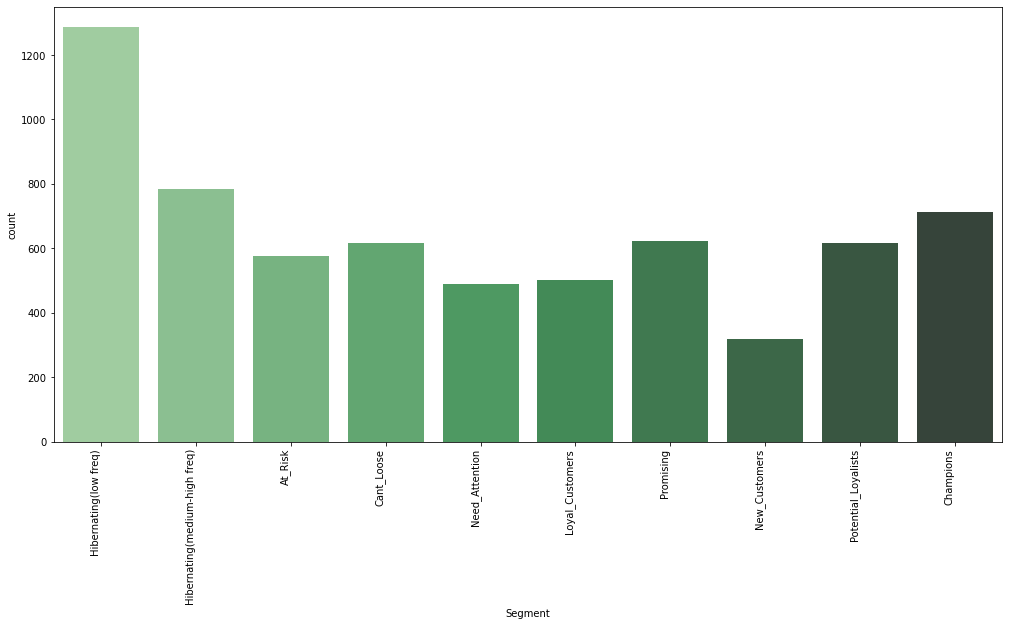

In [21]:
#Barchart to visualize the results with absolute numbers

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,8))
barplot = sns.barplot(data=df_barchart, x=df_barchart.index, y=df_barchart.iloc[:,0], palette="Greens_d", order=["Hibernating(low freq)", "Hibernating(medium-high freq)", "At_Risk", "Cant_Loose", "Need_Attention", "Loyal_Customers", "Promising", "New_Customers", "Potential_Loyalists", "Champions"])
barplot.set_xticklabels(barplot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

[Text(0, 0, 'Hibernating(low freq)'),
 Text(1, 0, 'Hibernating(medium-high freq)'),
 Text(2, 0, 'At_Risk'),
 Text(3, 0, 'Cant_Loose'),
 Text(4, 0, 'Need_Attention'),
 Text(5, 0, 'Loyal_Customers'),
 Text(6, 0, 'Promising'),
 Text(7, 0, 'New_Customers'),
 Text(8, 0, 'Potential_Loyalists'),
 Text(9, 0, 'Champions')]

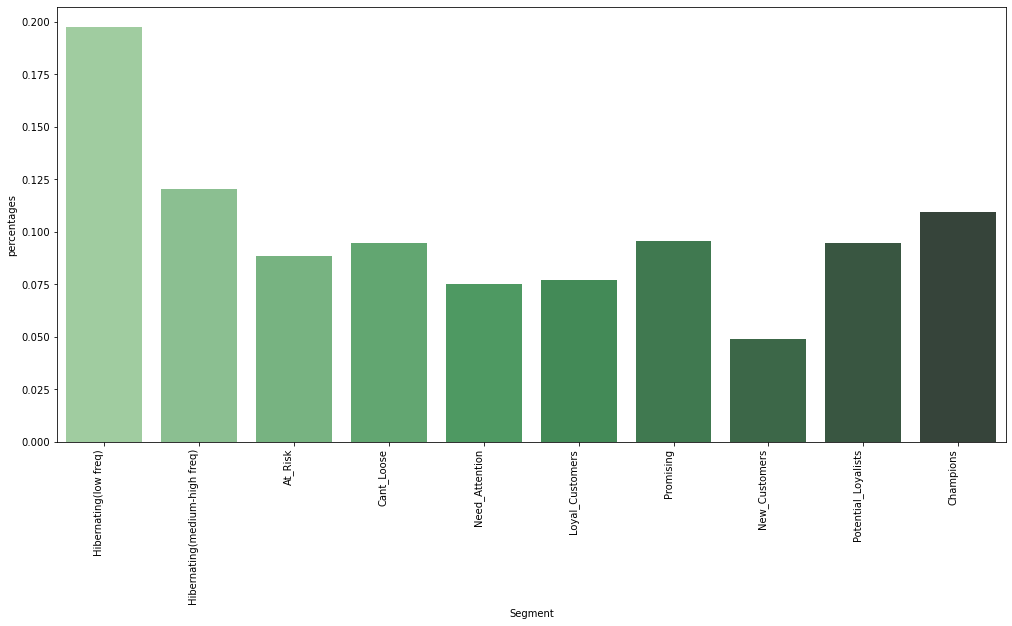

In [22]:
#Barchart to visualize the results with percentages

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,8))
barplot = sns.barplot(data=df_barchart, x=df_barchart.index, y=df_barchart.iloc[:,1], palette="Greens_d", order=["Hibernating(low freq)", "Hibernating(medium-high freq)", "At_Risk", "Cant_Loose", "Need_Attention", "Loyal_Customers", "Promising", "New_Customers", "Potential_Loyalists", "Champions"])
barplot.set_xticklabels(barplot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

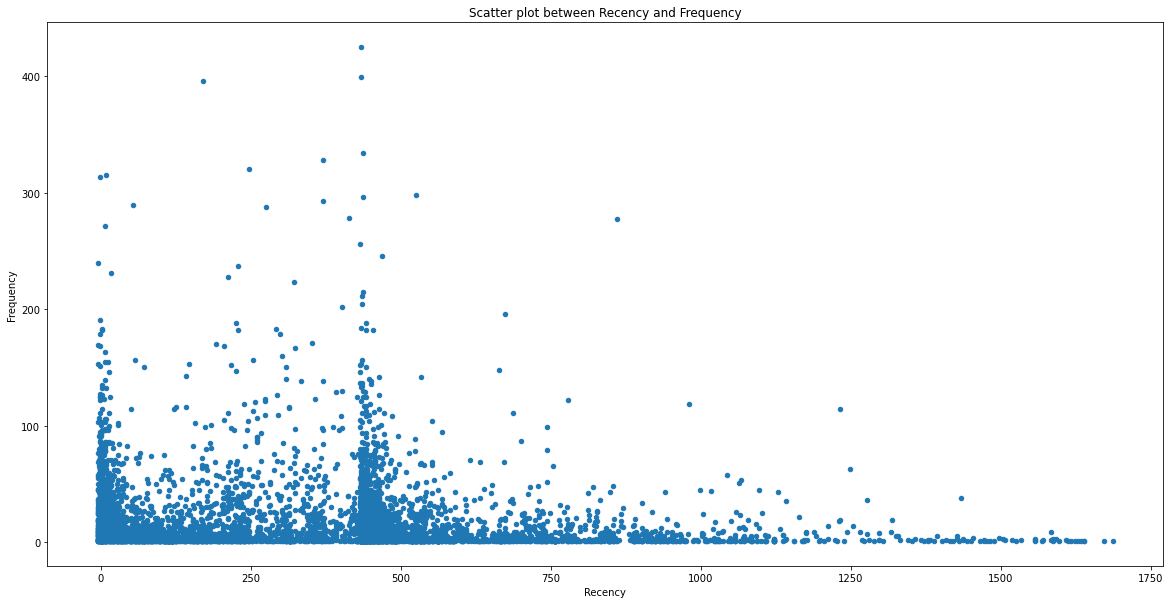

In [23]:
#Simple Scatterplot
plt.rcParams["figure.figsize"] = (20,10)
rfm.plot.scatter(x="Recency", y="Frequency", title= "Scatter plot between Recency and Frequency")
plt.show()

In [24]:
#Outlier identification and possible removal
print(rfm_lockers.sort_values(by=["Monetary"], ascending=False).head(5))

print("The customer who spent 1698 euros in service is Oscar Espi, he bought something 94 times and he is a role_user_client")

print(rfm_lockers.sort_values(by=["Frequency"], ascending=False).head(5))


     user_id  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
466     2742       -1         95   1744.25            4              3   
39       158      860        277   1427.92            1              3   
862     4863      436         62   1089.30            2              3   
113      256      443         84    917.75            2              3   
160      351      513         77    915.81            1              3   

     MonetaryScore RFM_SCORE                        Segment  \
466              2       432                      Champions   
39               2       132  Hibernating(medium-high freq)   
862              2       232                     Cant_Loose   
113              2       232                     Cant_Loose   
160              2       132  Hibernating(medium-high freq)   

            locker_name  Groups  
466               Bayer  Office  
39                Bayer  Office  
862  Grupo Air Products  Office  
113               Bayer  Office  
160   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


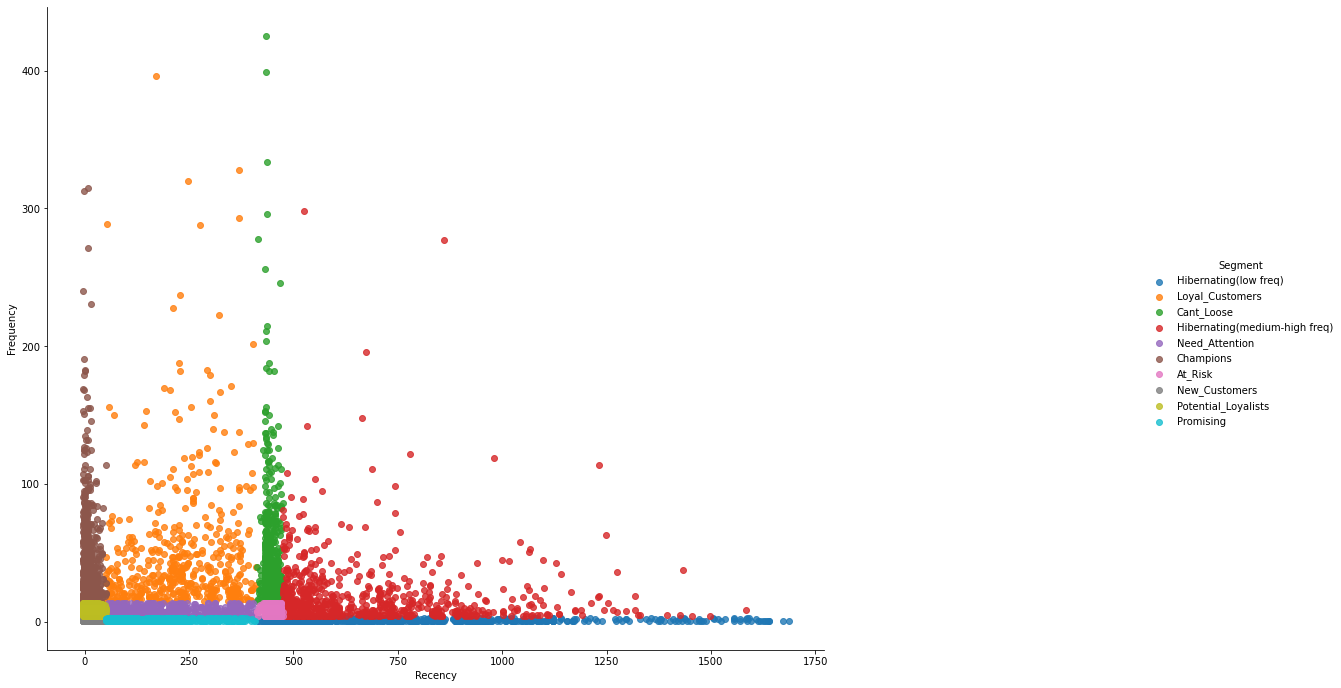

In [25]:
#Scatterplot with different colors for different segments
import seaborn as sns

g = sns.lmplot('Recency', 'Frequency', data=rfm, hue='Segment', fit_reg=False)
g.fig.set_size_inches(20,10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


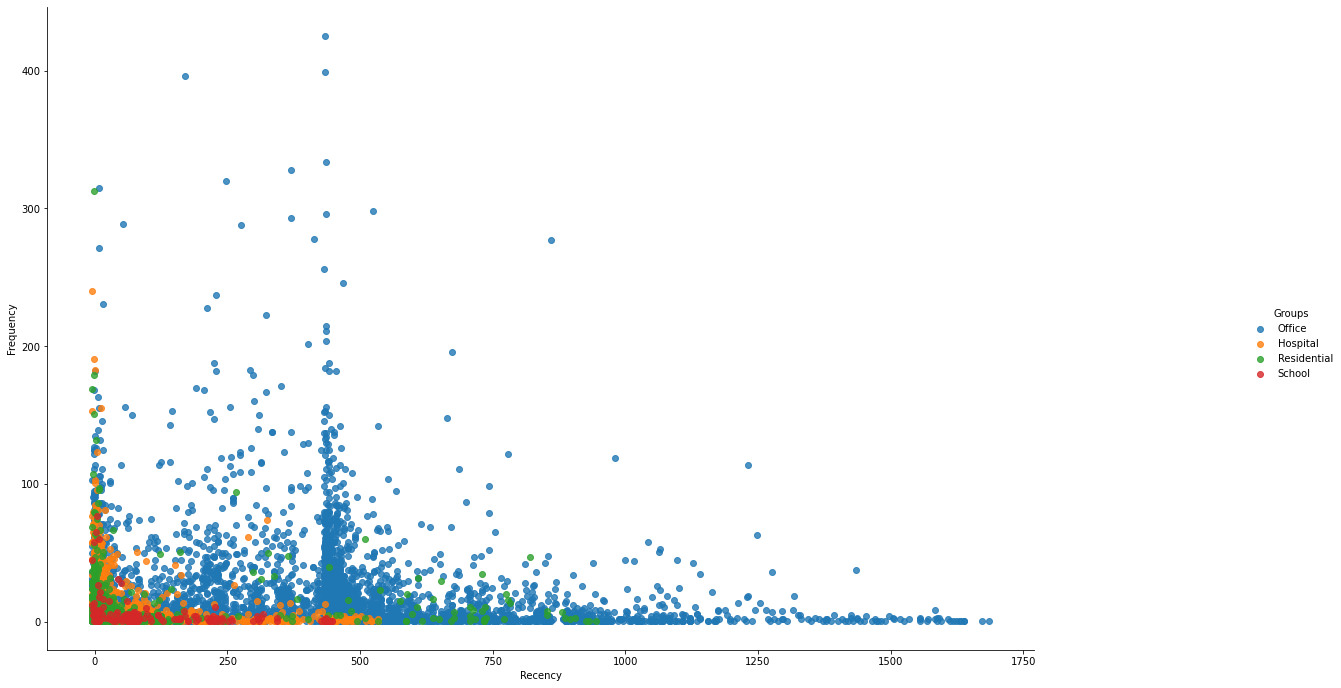

In [26]:
#Scatterplot with different colors for different groups

g = sns.lmplot('Recency', 'Frequency', data=rfm_lockers, hue='Groups', fit_reg=False)
g.fig.set_size_inches(20,10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


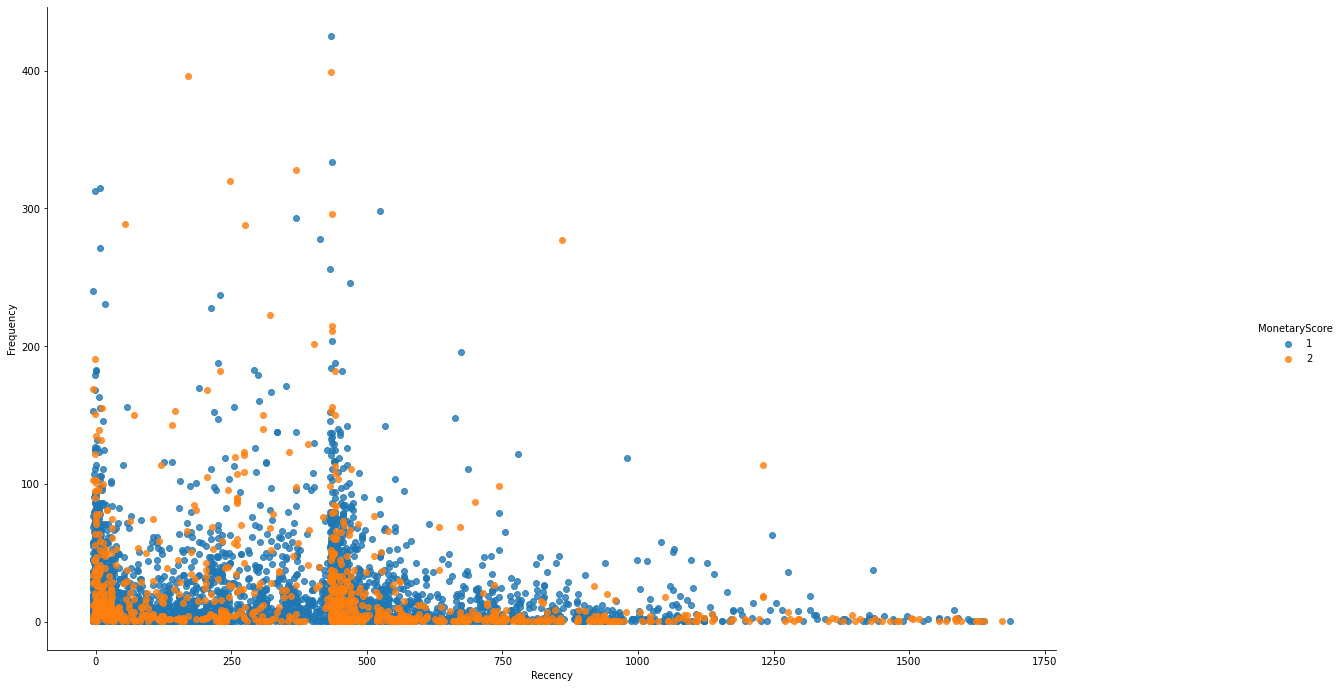

In [27]:
#Scatterplot with different colors for customers who used or never used services that are not paqueteria

g = sns.lmplot('Recency', 'Frequency', data=rfm_lockers, hue='MonetaryScore', fit_reg=False)
g.fig.set_size_inches(20,10)

            Recency  Frequency  Monetary
Recency    1.000000  -0.112462  0.033708
Frequency -0.112462   1.000000  0.133091
Monetary   0.033708   0.133091  1.000000


<AxesSubplot:>

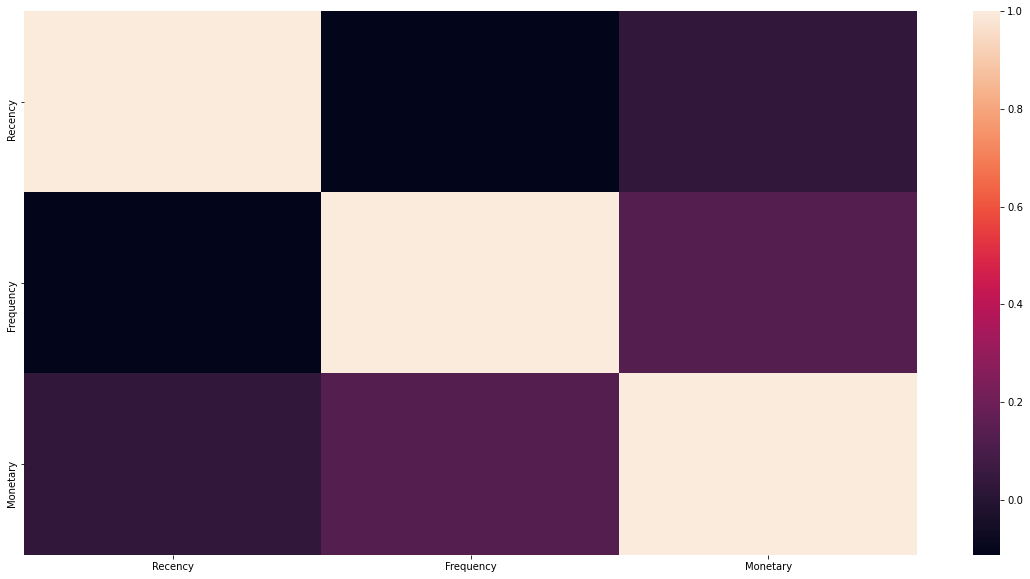

In [28]:
#Heatmap with a correlation score between monetary, frequency and recency
print(rfm_lockers.iloc[:, 1:4].corr())
sns.heatmap(rfm_lockers.iloc[:, 1:4].corr())

            Recency  Frequency  Monetary
Recency    1.000000  -0.146463  0.052305
Frequency -0.146463   1.000000  0.167831
Monetary   0.052305   0.167831  1.000000
Even cutting the data there are not significant correlations among the three variables for the customers


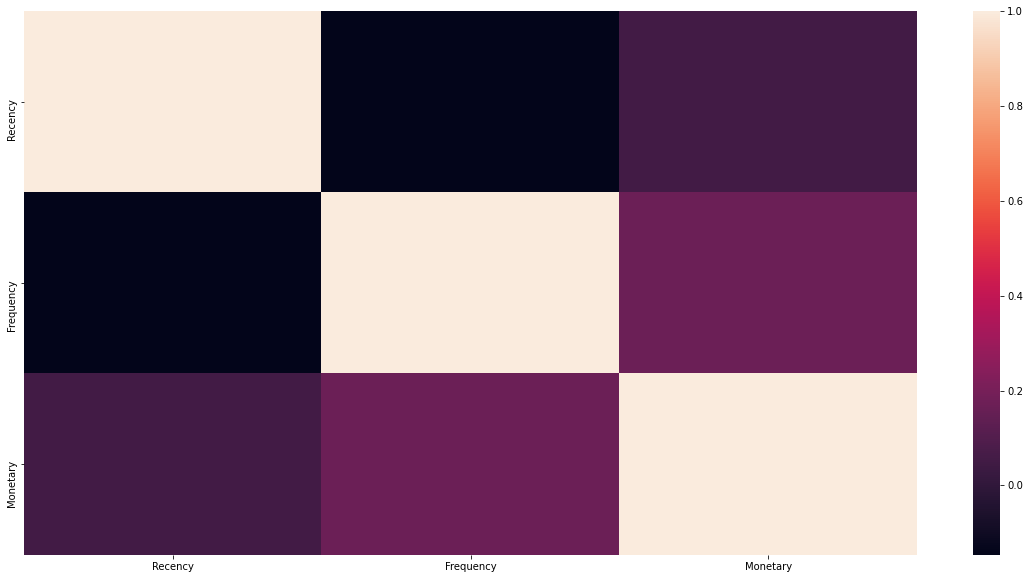

In [29]:
#Heatmap cutting the data from the beginning of the pandemic in order to see if there is correlation between freq and recency
rfm_lockers_frompandemic = rfm_lockers.query("Recency > 420")
print(rfm_lockers_frompandemic.iloc[:, 1:4].corr())
sns.heatmap(rfm_lockers_frompandemic.iloc[:, 1:4].corr())
print("Even cutting the data there are not significant correlations among the three variables for the customers")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

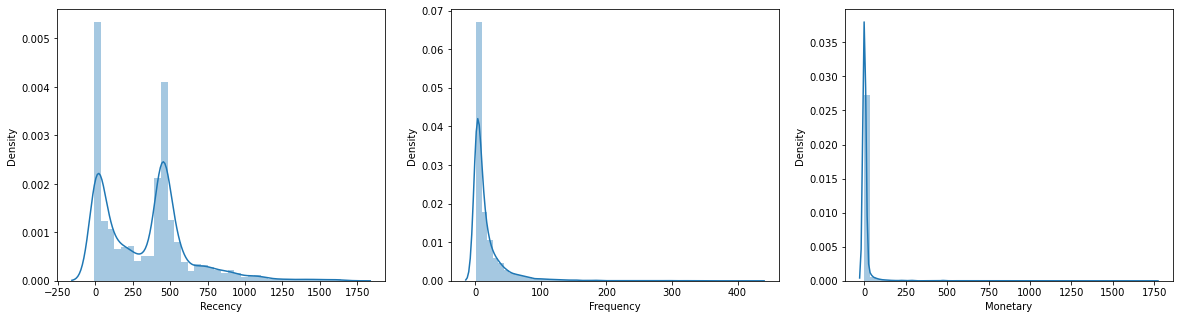

In [30]:
#Histogram for recency, frequency and monetary
#https://medium.com/swlh/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-93aa4c79f7a7

rfm_df = rfm[["Recency", "Frequency","Monetary"]]
fig, axes = plt.subplots(1,3, figsize=(20,5))
for i, feature in enumerate(list(rfm_df.columns)):
    sns.distplot(rfm_df[feature], ax=axes[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

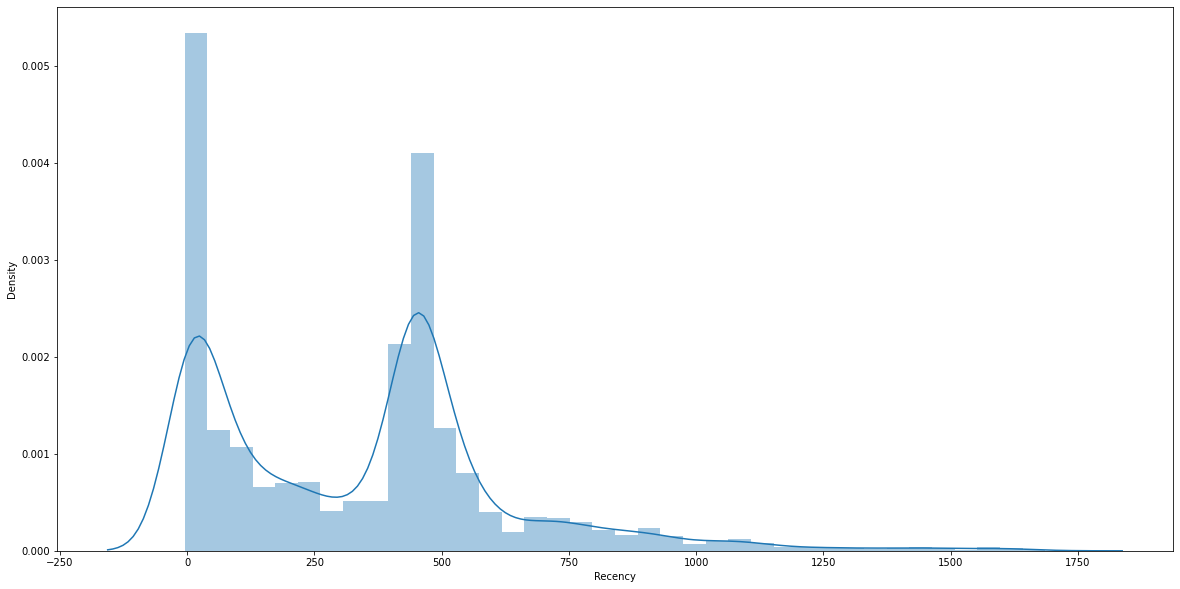

In [31]:
sns.distplot(rfm_df["Recency"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

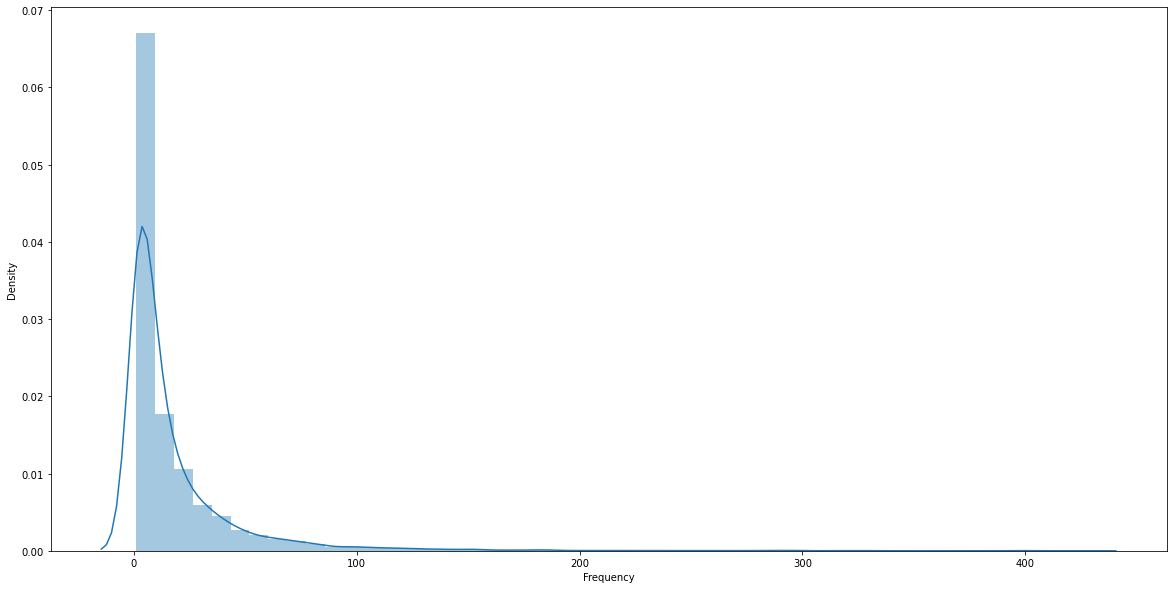

In [32]:
sns.distplot(rfm_df["Frequency"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

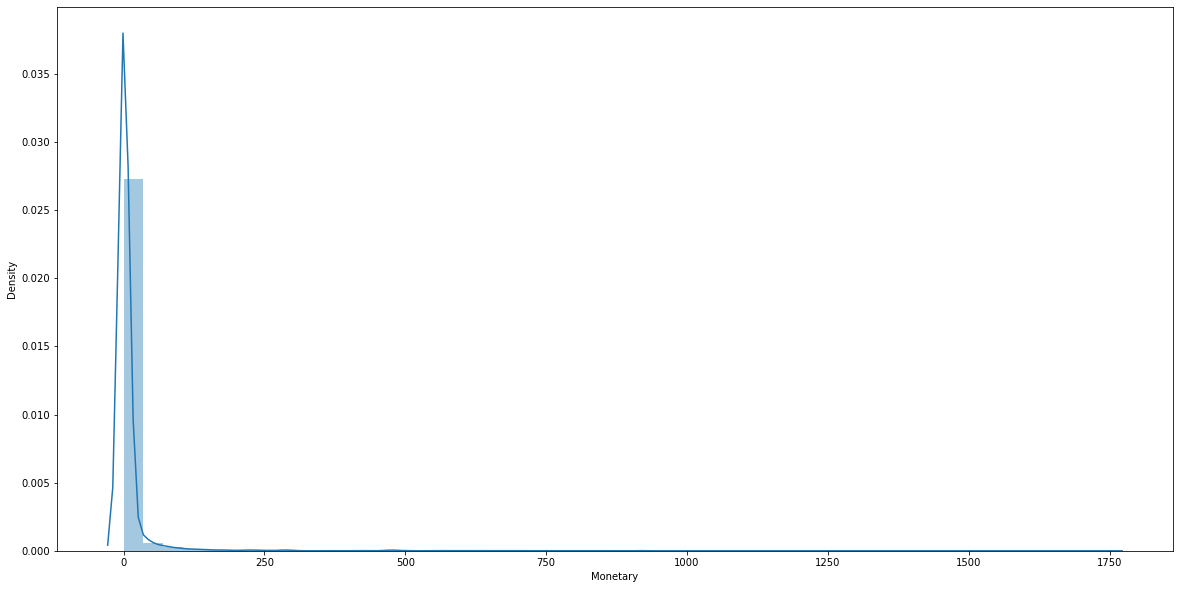

In [33]:
sns.distplot(rfm["Monetary"])

In [34]:
#Percentage of users that used other services that are not paqueteria
print(rfm_lockers.MonetaryScore.value_counts(normalize=True))

#Percentage of users that used other services that are not paqueteria for each segment
segments_with_serviceUsers = rfm_lockers.groupby(["Segment", "MonetaryScore"]).size()
segments_with_serviceUsers = pd.DataFrame(segments_with_serviceUsers)
segments_with_serviceUsers
segments_with_serviceUsers['percent'] = segments_with_serviceUsers.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
segments_with_serviceUsers.rename(columns={"0": "n. users", "percent": "percentage users"}, inplace=True)
segments_with_serviceUsers.sort_values(by=["percentage users"])

1    0.863809
2    0.136191
Name: MonetaryScore, dtype: float64


,,0,percentage users
Segment,MonetaryScore,,
New_Customers,2,18,0.06
At_Risk,2,40,0.07
Potential_Loyalists,2,57,0.09
Need_Attention,2,54,0.11
Promising,2,73,0.12
Champions,2,93,0.13
Hibernating(medium-high freq),2,107,0.14
Cant_Loose,2,89,0.14
Hibernating(low freq),2,254,0.20


In [35]:
#Analysis of the good(with good frequency) customers that are inactive since the beginning of the pandemic:AtRisk and CantLoose

#Percentages column
df_barchart['percentages']= df_barchart['count']/df_barchart['count'].sum()
print(df_barchart.sort_values(by=["percentages"]))

#Percentage of these good customers that are inactive more or less since the pandemic begun
print("""
      Percentage of customers At Risk, customers with good frequency(3-10 purchases), that dont'use the service
      since the beginning of the pandemic:""", df_barchart.iloc[1,1])

print("""
      Percentage of customers Cant Loose, customers with high frequency(more than 10 purchases), that dont'use the service
      since the beginning of the pandemic:""", df_barchart.iloc[2,1])

print("""
      Percentage of these two categories summed up:""", df_barchart.iloc[1,1]+df_barchart.iloc[2,1])

print("""
      Number of users belonging to these two categories summed up:""", df_barchart.iloc[1,0]+df_barchart.iloc[2,0])

#Among the good customers that are inactive more or less since the pandemic begun, how many of them belong to a smartpoint
#that is generally inactive since the pandemic and how many belong to a smartpoint that is still doing good
#doing this split we will be able to understand whcich of the users stopped using the smartlockers due to their absence in
#the office and which one did it because of other reasons

                               count  percentages
Segment                                          
New_Customers                    318     0.048766
Need_Attention                   490     0.075142
Loyal_Customers                  501     0.076829
At_Risk                          575     0.088177
Cant_Loose                       615     0.094311
Potential_Loyalists              618     0.094771
Promising                        623     0.095537
Champions                        712     0.109186
Hibernating(medium-high freq)    783     0.120074
Hibernating(low freq)           1286     0.197209

      Percentage of customers At Risk, customers with good frequency(3-10 purchases), that dont'use the service
      since the beginning of the pandemic: 0.09431068854470173

      Percentage of customers Cant Loose, customers with high frequency(more than 10 purchases), that dont'use the service
      since the beginning of the pandemic: 0.10918570771354087

      Percentage of these two catego

In [36]:
#You need to calculate the percentage of Segment present in each different smartpoints and then order them by highest percentage
#of At_Risk + Cant_Loose and then figure out what's the percentage of users belonigng to these two categories that also belong
#to one of the smartpoints that heavily suffered the pandemic

#Calculate the percentage of users belonging to each different segment for each smartpoint

lockers_percent_segments = rfm_lockers.groupby(["locker_name", "Segment"]).size()
lockers_percent_segments = pd.DataFrame(lockers_percent_segments)
lockers_percent_segments['percent'] = lockers_percent_segments.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))

#Print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (lockers_percent_segments)

                                                            0  percent
locker_name                Segment                                    
Adequa 3                   Champions                        2     0.05
                           Loyal_Customers                  1     0.02
                           Need_Attention                   7     0.17
                           New_Customers                    6     0.14
                           Potential_Loyalists             16     0.38
                           Promising                       10     0.24
Adequa 6                   Champions                        5     0.07
                           Need_Attention                   9     0.12
                           New_Customers                   15     0.20
                           Potential_Loyalists             17     0.23
                           Promising                       28     0.38
Almirall Bcn               At_Risk                          1     0.02
      

In [37]:
#Calculate the percentage of users belonging to the class Cant_Loose or At_Risk for each Smartpoint

lockers_percent_CantLooseAtRisk = pd.DataFrame(lockers_percent_segments)
lockers_percent_CantLooseAtRisk = lockers_percent_CantLooseAtRisk.query("Segment == ['At_Risk', 'Cant_Loose']")
lockers_percent_CantLooseAtRisk = lockers_percent_CantLooseAtRisk.groupby(level=0, axis=0).sum()
lockers_percent_CantLooseAtRisk = lockers_percent_CantLooseAtRisk.sort_values(by="percent", ascending = False)
lockers_percent_CantLooseAtRisk

,0,percent
locker_name,,
MB ONE,4,0.50
Logitek,11,0.48
Firmenich,29,0.41
Grupo Air Products,109,0.39
T Systems,133,0.38
Vector ITC Group,51,0.34
Glories,79,0.33
Jose Echegaray 8,5,0.31
Bayer,256,0.30


In [38]:
lockers_percent_CantLooseAtRisk.sum()

0          1195.00
percent       7.17
dtype: float64

In [39]:
vc = rfm_lockers.user_id.value_counts()
vc.head(60)

9134     3
23503    3
16706    2
20763    2
6961     2
12445    2
16885    2
17771    2
15920    2
21196    2
18570    2
20637    2
6114     2
7035     2
10282    2
20170    2
18413    2
20508    2
20524    2
15556    2
15682    2
15058    2
20532    2
10491    2
18252    2
12607    2
18703    2
12587    2
24857    2
20681    2
20008    2
24373    2
2823     2
24310    2
11878    2
12600    2
6699     2
12581    2
16323    2
6572     2
12769    2
10301    2
4528     2
14172    2
16004    2
15689    2
19585    2
19628    2
24303    2
21041    2
20585    2
14957    2
24006    2
24214    2
9837     2
19289    2
7665     1
5592     1
13764    1
21960    1
Name: user_id, dtype: int64

In [40]:
#Let's say that we label as Smartpoints that have been strongly affected by the pandemics the smartpoints with more than 20%
#of the users that belong to one of these two Categories(users with gigh frequency that stopped using the locker at the 
#beginning of the pandemic)


#Select just the users belonging to Cant_Loose or At_Risk and also to the Smartpoints that have been strongly affected by the
#pandemics

pandemic_lost_users = rfm_lockers.query("Segment == ['At_Risk', 'Cant_Loose']")
pandemic_lost_users = pandemic_lost_users.query("locker_name == ['Logitek','MB ONE','Firmenich','Grupo Air Products','T Systems','Vector ITC Group','Glories','Bayer','Parc Logistic Zona Franca','CBRE','Via Augusta','Emesa','VBP Australia','Jose Echegaray','HPE','Auditori+Esteve' , 'Torre Chamartin']")
pandemic_lost_users

,user_id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,locker_name,Groups
2,110,441,150,19.50,2,3,2,232,Cant_Loose,Bayer,Office
9,120,436,55,0.00,2,3,1,231,Cant_Loose,Bayer,Office
10,121,443,62,138.64,2,3,2,232,Cant_Loose,Bayer,Office
14,128,456,84,0.00,2,3,1,231,Cant_Loose,Bayer,Office
15,130,434,184,0.00,2,3,1,231,Cant_Loose,Bayer,Office
...,...,...,...,...,...,...,...,...,...,...,...
4389,16113,435,5,0.00,2,2,1,221,At_Risk,Bayer,Office
4429,16250,443,4,0.00,2,2,1,221,At_Risk,VBP Australia,Office
4431,16255,441,5,0.00,2,2,1,221,At_Risk,Bayer,Office
4470,16349,443,4,0.00,2,2,1,221,At_Risk,VBP Australia,Office


In [41]:
#The percentage of good(with good frequency) customers that are inactive since the beginning of the pandemic and they
#probably stopped using the service because they were not anymore in the office

print("""
      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service not due to the pandemic:""", 1176-978)

print("""
      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service due to the pandemic:""", 978)

print("""
      Percentage of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service due to the pandemic:""", 978/1176)

print("""
      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service not due to the pandemic:""", 1-978/1176)


      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service not due to the pandemic: 198

      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service due to the pandemic: 978

      Percentage of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service due to the pandemic: 0.8316326530612245

      Number of good(with good frequency) users that are inactive since the beginning of the pandemic and they
      probably stopped using the service not due to the pandemic: 0.16836734693877553


In [42]:
#Who are the Champions?

#Percentage of Champions belonging to Office, Hospital, School, Residential

group_percent_segments = rfm_lockers.groupby(["Segment", "Groups"]).size()
group_percent_segments = pd.DataFrame(group_percent_segments)
group_percent_segments['percent'] = group_percent_segments.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
group_percent_champions = group_percent_segments.query("Segment == ['Champions']")
print(group_percent_champions.sort_values(by="percent", ascending = False))

#Percentage of users belogning to champions segment for each group

group_percent_segments2 = rfm_lockers.groupby(["Groups", "Segment"]).size()
group_percent_segments2 = pd.DataFrame(group_percent_segments2)
group_percent_segments2['percent'] = group_percent_segments2.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
group_percent_champions2 = group_percent_segments2.query("Segment == ['Champions']")
print(group_percent_champions2.sort_values(by="percent", ascending = False))


#Top 20 smartlockers according to the percentage of users that are Champions

lockers_top10percent_Champions = rfm_lockers.groupby(["locker_name", "Segment"]).size()
lockers_top10percent_Champions = pd.DataFrame(lockers_top10percent_Champions)
lockers_top10percent_Champions['percent'] = lockers_top10percent_Champions.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
lockers_top10percent_Champions = lockers_top10percent_Champions.query("Segment == ['Champions']")
lockers_top10percent_Champions = lockers_top10percent_Champions.sort_values(by="percent", ascending = False)
print(lockers_top10percent_Champions.head(20))

#What's the percentage of Champions that signed up in 2016-2017-2018-2019-2020-2021?

champions_users = rfm_lockers.query("Segment == ['Champions']")
when_champions_subscribed = pd.merge(orders2,champions_users,on='user_id')
when_champions_subscribed = when_champions_subscribed.groupby("user_id").agg({'created_at': lambda date: date.min()})
when_champions_subscribed = pd.DataFrame(when_champions_subscribed)
when_champions_subscribed.created_at = when_champions_subscribed.created_at.dt.strftime("%y")
when_champions_subscribed = when_champions_subscribed.value_counts(normalize=True)
when_champions_subscribed

                         0  percent
Segment   Groups                   
Champions Office       373     0.52
          Hospital     229     0.32
          Residential  108     0.15
          School        12     0.02
                         0  percent
Groups      Segment                
Hospital    Champions  229     0.28
Residential Champions  108     0.17
School      Champions   12     0.09
Office      Champions  373     0.07
                                    0  percent
locker_name            Segment                
Zambon                 Champions   19     0.39
Uriach Urquima         Champions   11     0.38
Francisco Aragon       Champions   19     0.38
VBP Brasil             Champions   12     0.36
BeCorp                 Champions   13     0.36
Uriach Palau Plegamans Champions   29     0.33
Aquamarina             Champions    1     0.33
Hospital SJD merged    Champions  153     0.31
Hospital Bellvitge     Champions   30     0.31
Beethoven              Champions    4     0.29
Buda

created_at
20            0.571629
19            0.223315
21            0.106742
18            0.088483
17            0.008427
16            0.001404
dtype: float64

In [43]:
#Who are the Users that do not figure in this segmentation because they have 0 orders



# MACHINE LEARNING UNSUPERVISED CLUSTERING WITH K-MEANS

 1) Clustering with Monetary, Frequency, Recency \
 2) Clustering just with Frequency, Recency

# 1) Clustering with Monetary, Frequency, Recency

In [44]:
#MACHINE LEARNING UNSUPERVISED CLUSTERING WITH K-MEANS
#https://medium.com/swlh/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-93aa4c79f7a7


#Now I will use K-Means algorithm using monetary, frequency and recency to segment clusters and then I will compare them with
#the previous segmentation




#First of all I will normalize the value of the 3 variables scaling them in a range of value from 0 to 1 to avoid biases in clustering
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df))
rfm_normalized.columns = ["n_recency", "n_frequency", "n_monetary"]
rfm_normalized.describe()

,n_recency,n_frequency,n_monetary
count,6521.000000,6521.000000,6521.000000
mean,0.202556,0.039252,0.004828
std,0.172406,0.071066,0.031316
min,0.000000,0.000000,0.000000
25%,0.032525,0.002358,0.000000
50%,0.246008,0.014151,0.000000
75%,0.283264,0.044811,0.000000
max,1.000000,1.000000,1.000000


In [45]:
#Comparison with the variables before being normalized

rfm_df.describe()

,Recency,Frequency,Monetary
count,6521.000000,6521.000000,6521.000000
mean,337.522466,17.642693,8.420394
std,291.537841,30.131826,54.622462
min,-5.000000,1.000000,0.000000
25%,50.000000,2.000000,0.000000
50%,411.000000,7.000000,0.000000
75%,474.000000,20.000000,0.000000
max,1686.000000,425.000000,1744.250000


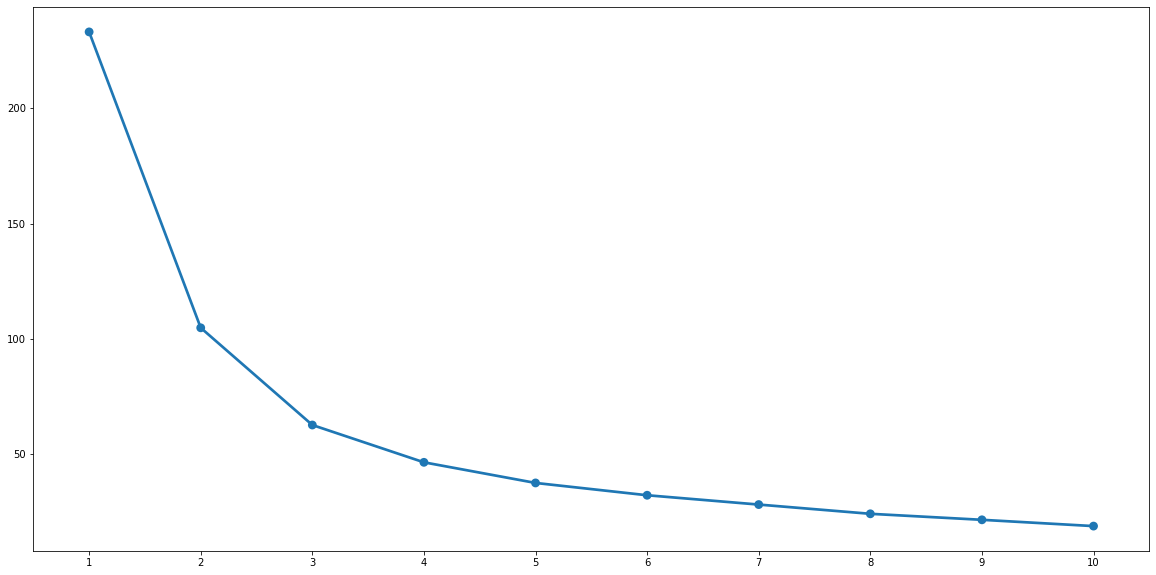

In [46]:
#Segmenting with K-Means. Identify the optimal k.

from sklearn.cluster import KMeans

SSE = []
for k in range(0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(rfm_normalized)
    SSE.append(kmeans.inertia_)
    
#Plot of Inertia against k. ‘Elbow’ at k=4, where the decrement in inertia after k=6 is insignificant, it does not worth to
#further complicate the model.

sns.pointplot(x=list(range(1,11)), y=SSE)
plt.show()

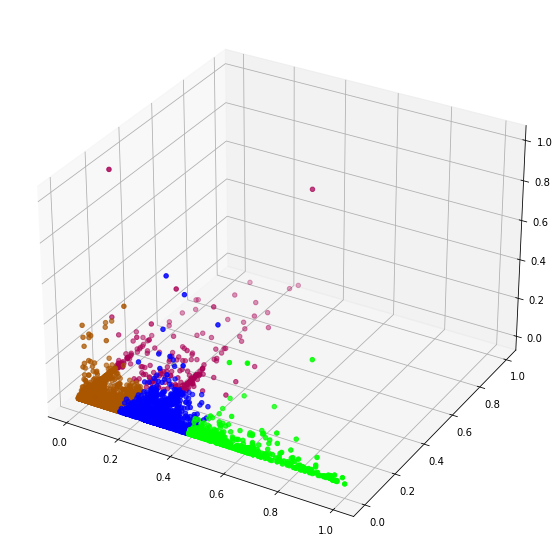

In [47]:
#3dimensions scatterplot to visualize the 4 clusters

model = KMeans(n_clusters=4, random_state=1231).fit(rfm_normalized)
centers = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(rfm_normalized["n_recency"], rfm_normalized["n_frequency"], rfm_normalized["n_monetary"], cmap= "brg", c=model.predict(rfm_normalized))
ax.scatter(centers[:,0], centers[:,1], c="black");

In [48]:
#Identifying the clusters
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_normalized))
rfm_.columns = rfm_df.columns
rfm_["user_id"] = rfm_df.index
rfm_["Cluster"] = model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


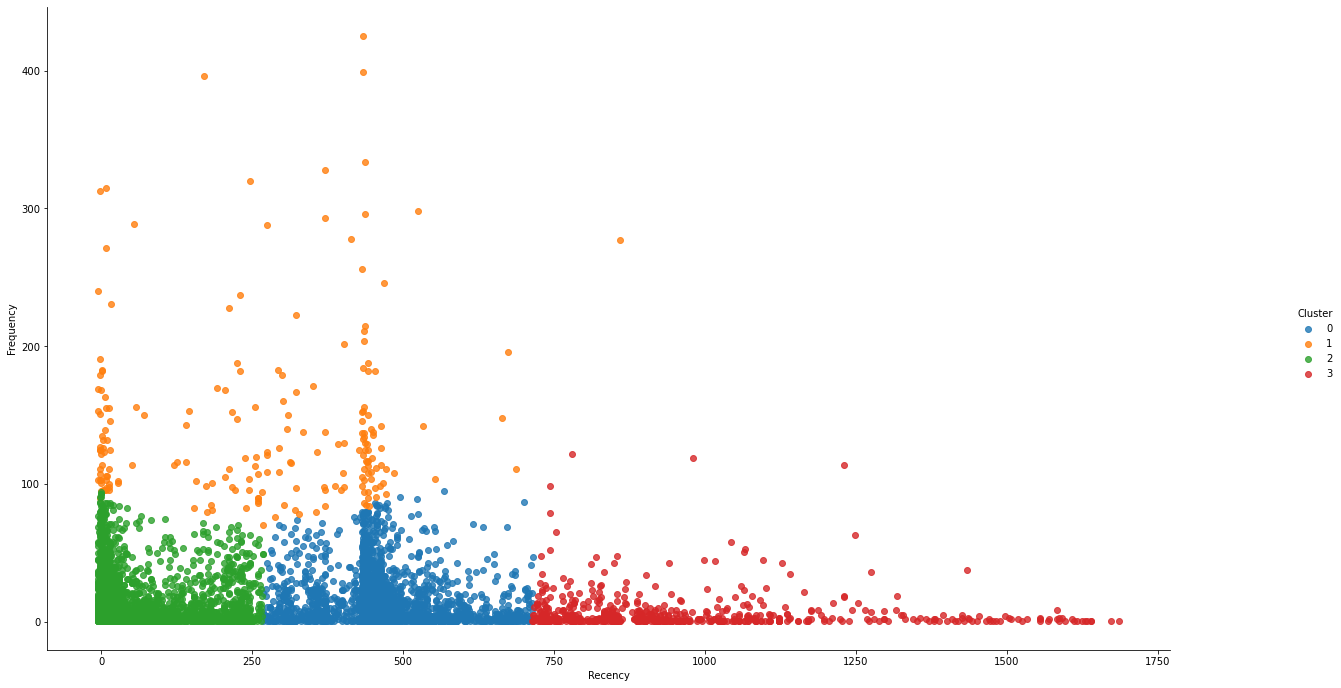

In [49]:
#Scatterplot with different colors for different clusters detected

g = sns.lmplot('Recency', 'Frequency', data=rfm_, hue='Cluster', fit_reg=False)
g.fig.set_size_inches(20,10)

In [50]:
#Statistics to define the clusters

rfm_.groupby("Cluster").agg({
    "Recency":["mean","min","max"],
    "Frequency":["mean","min","max"],
    "Monetary":["mean","min","max","count"]})   

Recency                  Frequency                Monetary       \
               mean    min     max        mean   min    max       mean  min   
Cluster                                                                       
0        467.036716  267.0   715.0   13.442924   1.0   95.0   7.442694  0.0   
1        265.547739   -5.0   860.0  143.391960  70.0  425.0  43.205879  0.0   
2         66.902849   -5.0   268.0   15.297663   1.0   94.0   6.150099  0.0   
3        962.105442  714.0  1686.0    7.403061   1.0  122.0  12.200918  0.0   

                        
             max count  
Cluster                 
0        1089.30  2996  
1        1744.25   199  
2         852.00  2738  
3         715.58   588

In [51]:
#Looking at the percentage for each cluster of users that have a monetary bigger than 0

clusters_and_serviceusage = rfm_.groupby('Cluster')['Monetary'].apply(lambda c: (c>0).sum()/len(c))
clusters_and_serviceusage

Cluster
0    0.120828
1    0.331658
2    0.108473
3    0.268707
Name: Monetary, dtype: float64

In [52]:
#Trying to define the clusters

print(""" cluster 0 = Super High Frequency, Top usage of service
Il cluster 0 sono i clienti ad altissima frequenza, che non utilizzano lo smartlocker da massimo due anni,
e che hanno utilizzato nettamente più servizi di tutti
""")

print(""" cluster 1 = Hibernated users(not covid related) that tried services
Il cluster 1 sono tutti i clienti che hanno smesso di utilizzare lo smartlocker da più di due anni,
ma hanno utilizzato mediamente ben più servizi che i cluster 2 e 3
""")

print(""" cluster 2 = Inactive users also covid related
Il cluster 2 sono tutti i clienti che hanno smesso di utilizzare lo smartlocker tra uno e due anni fa,
e che hanno utilizzato ben poco i servizi
""")

print(""" cluster 3 = Active customers
Il cluster 3 sono i clienti che hanno utilizzato recentemente lo smartlocker, non più di 9 mesi fà,
sono quelli che hanno utilizzato meno di tutti i servizi""")

 cluster 0 = Super High Frequency, Top usage of service
Il cluster 0 sono i clienti ad altissima frequenza, che non utilizzano lo smartlocker da massimo due anni,
e che hanno utilizzato nettamente più servizi di tutti

 cluster 1 = Hibernated users(not covid related) that tried services
Il cluster 1 sono tutti i clienti che hanno smesso di utilizzare lo smartlocker da più di due anni,
ma hanno utilizzato mediamente ben più servizi che i cluster 2 e 3

 cluster 2 = Inactive users also covid related
Il cluster 2 sono tutti i clienti che hanno smesso di utilizzare lo smartlocker tra uno e due anni fa,
e che hanno utilizzato ben poco i servizi

 cluster 3 = Active customers
Il cluster 3 sono i clienti che hanno utilizzato recentemente lo smartlocker, non più di 9 mesi fà,
sono quelli che hanno utilizzato meno di tutti i servizi


# 2) Clustering with Recency, Frequency

In [53]:
#First of all I will normalize the value of the 3 variables scaling them in a range of value from 0 to 1 to avoid biases in clustering

rfm_df = rfm[["Recency", "Frequency"]]

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df))
rfm_normalized.columns = ["n_recency", "n_frequency"]
rfm_normalized.describe()

,n_recency,n_frequency
count,6521.000000,6521.000000
mean,0.202556,0.039252
std,0.172406,0.071066
min,0.000000,0.000000
25%,0.032525,0.002358
50%,0.246008,0.014151
75%,0.283264,0.044811
max,1.000000,1.000000


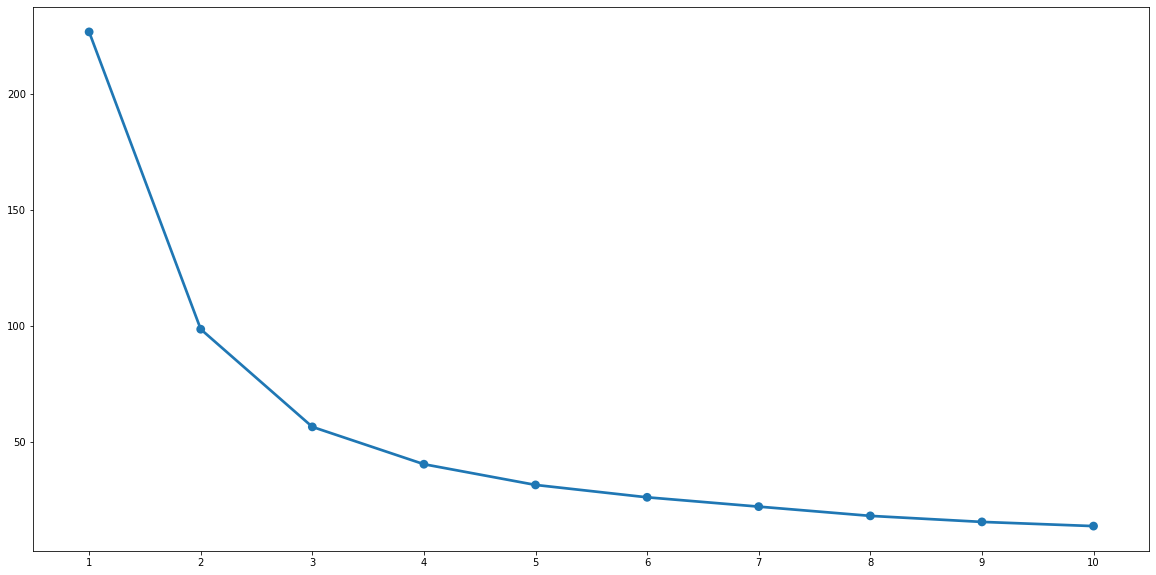

In [54]:
#Segmenting with K-Means. Identify the optimal k.

from sklearn.cluster import KMeans

SSE = []
for k in range(0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(rfm_normalized)
    SSE.append(kmeans.inertia_)
    
#Plot of Inertia against k. ‘Elbow’ at k=4, where the decrement in inertia after k=6 is insignificant, it does not worth to
#further complicate the model.

sns.pointplot(x=list(range(1,11)), y=SSE)
plt.show()

In [55]:
#Using 4 clusters K-means with just Recency and Frequency

model = KMeans(n_clusters=4, random_state=1231).fit(rfm_normalized)
centers = model.cluster_centers_

#Identifying the clusters
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_normalized))
rfm_.columns = rfm_df.columns
rfm_["user_id"] = rfm_df.index
rfm_["Cluster"] = model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


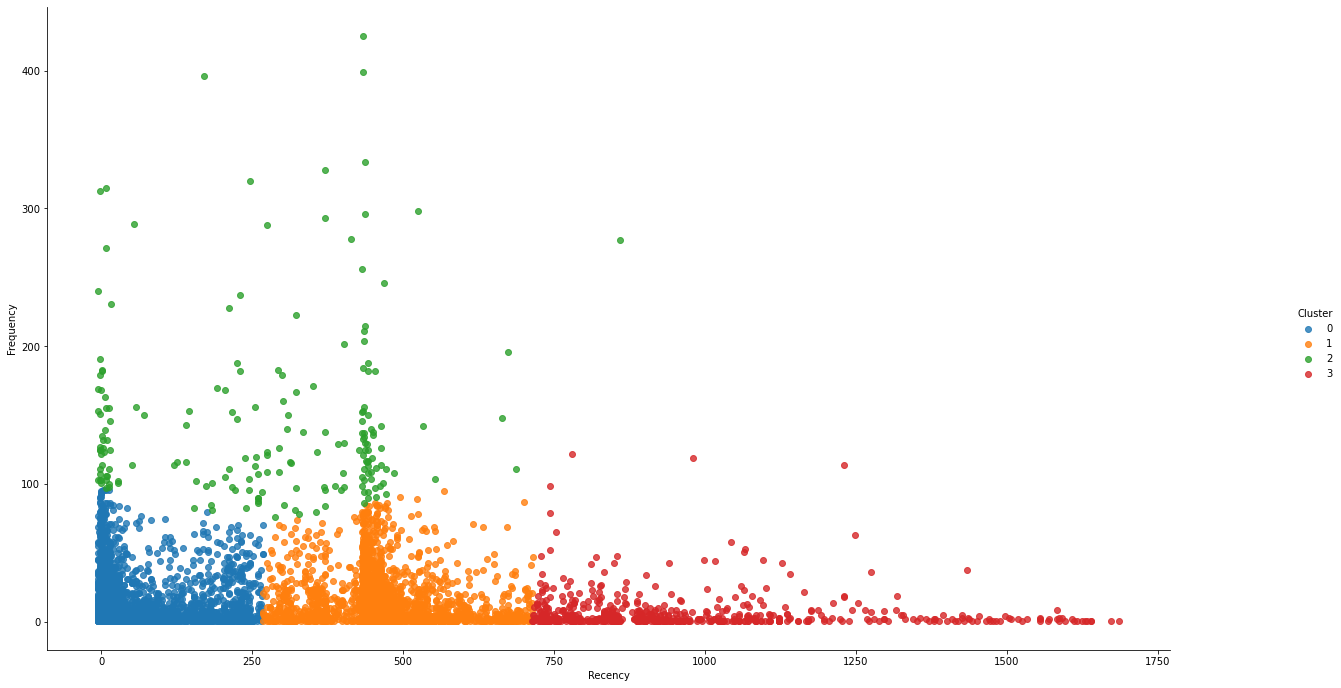

In [56]:
#Scatterplot with different colors for different clusters detected

g = sns.lmplot('Recency', 'Frequency', data=rfm_, hue='Cluster', fit_reg=False)
g.fig.set_size_inches(20,10)

In [59]:
rfm_lockers.query("user_id == 14989")

,user_id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,locker_name,Groups
3939,14989,1,183,0.0,4,3,1,431,Champions,Hospital SJD merged,Hospital


In [60]:
rfm_lockers.query("user_id == 5078")

,user_id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,locker_name,Groups
917,5078,434,133,0.0,2,3,1,231,Cant_Loose,Grupo Air Products,Office


In [64]:
carine = orders2.query("user_id == 5078")
carine.sort_values(by=["created_at"])

,user_id,grand_total,created_at
22822,5078,0.0,2018-06-18 17:40:01
24256,5078,0.0,2018-07-05 13:38:11
24581,5078,0.0,2018-07-09 18:49:34
24777,5078,0.0,2018-07-11 15:55:36
24957,5078,0.0,2018-07-12 18:09:22
...,...,...,...
108492,5078,0.0,2020-02-12 09:01:06
109707,5078,0.0,2020-02-17 10:10:38
110657,5078,0.0,2020-02-19 12:11:29
111984,5078,0.0,2020-02-25 09:01:34


In [65]:
patricia = orders2.query("user_id == 14989")
patricia.sort_values(by=["created_at"])

,user_id,grand_total,created_at
95363,14989,0.0,2019-12-19 13:42:12
99242,14989,0.0,2020-01-10 09:57:18
99244,14989,0.0,2020-01-10 09:58:09
100769,14989,0.0,2020-01-15 13:54:54
101005,14989,0.0,2020-01-16 10:31:16
...,...,...,...
152465,14989,0.0,2021-05-03 12:39:36
153511,14989,0.0,2021-05-10 11:08:46
153714,14989,0.0,2021-05-11 10:46:24
153773,14989,0.0,2021-05-11 12:52:23


In [68]:
rfm_lockers.locker_name.unique()

array(['Bayer', 'Endesa', 'CBRE', 'BCN Coliving El Born',
       'Hospital Duran Reynals', 'Atrium 22', 'Glories',
       'Hospital SJD merged', 'Cobblestone', 'Castellana 81', 'GM169',
       'VBP Brasil', 'Uriach Urquima', 'Via Augusta 71 - SC', 'MediaTIC',
       'Almirall Sant Andreu', 'Auditori+Esteve', 'Emesa', 'Blue',
       'Grupo Air Products', 'WTC Almeda Park', 'HPE', 'Endesa Madrid',
       'Hospital Bellvitge', 'Vector ITC Group', 'Aribau 192',
       'Sifu Madrid', 'MB ONE', 'Blaekhus - Valby', 'GM214', 'Aticco',
       'TE Connectivity', 'T Systems', 'Beethoven', 'Logitek', 'Zambon',
       'Zabala 19', 'Loom - Cerro Gamos', 'Firmenich',
       'Parc Logistic Zona Franca', 'Wallbox', 'Torre Chamartin',
       'VBP Australia', 'Condesa de Venadito 1', 'DABA', 'Numancia 1',
       'BeCorp', 'Almirall Bcn', 'Parque Via Norte', 'Jose Echegaray 8 ',
       'Princesa 5', 'UPC - FME', 'Parque Norte', 'Almirall Sant Feliu',
       'UPC', 'Almirall Sant Celoni', 'Caixabank', 'Qui